## CSCI-467 Discussion (Week 1)

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [102]:
import pandas as pd
myCSV=pd.read_csv('Salaries.csv',header=0, index_col=3, skiprows= [1,2], engine='python')
myCSV=pd.DataFrame(myCSV)
myCSV

,yearID,teamID,lgID,salary
playerID,,,,
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
dedmoje01,1985,ATL,NL,150000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [104]:
myCSV[((myCSV['teamID']=='ATL') |(myCSV['teamID']== 'HOU'))& (myCSV['salary']>1000000)]

,yearID,teamID,lgID,salary
playerID,,,,
hornebo01,1985,ATL,NL,1500000
murphda05,1985,ATL,NL,1625000
suttebr01,1985,ATL,NL,1354167
ryanno01,1985,HOU,NL,1350000
hornebo01,1986,ATL,NL,1800000
...,...,...,...,...
quallch01,2015,HOU,AL,3000000
rasmuco01,2015,HOU,AL,8000000
singljo02,2015,HOU,AL,2000000


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [33]:
myCSV_ATL=myCSV[myCSV['teamID']=='ATL']
myCSV_ATL.describe()

,yearID,salary
count,884.000000,8.840000e+02
mean,1999.742081,2.209624e+06
std,8.757407,3.435810e+06
min,1985.000000,6.000000e+04
25%,1992.000000,3.000000e+05
50%,1999.500000,6.000000e+05
75%,2007.000000,2.412500e+06
max,2015.000000,1.606180e+07


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [95]:
myDir={}
easy= myCSV.to_dict()
for index, row in myCSV.iterrows():
    for i in myCSV.columns:
        if not i in myDir:
            myDir.update({i:{}})
        myDir[i].update({index:row[i]})
print(myDir == easy)

True


#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [105]:
df= pd.DataFrame(easy)
df.columns =["a",'b','c','d']
df

,a,b,c,d
benedbr01,1989,ATL,NL,395000
campri01,1986,ATL,NL,600000
ceronri01,1992,MON,NL,230000
chambch01,1986,ATL,NL,769452
dedmoje01,1988,CLE,AL,350000
...,...,...,...,...
barreaa01,2015,WAS,NL,514200
dendema01,2015,WAS,NL,512972
robincl01,2015,WAS,NL,525000
taylomi02,2015,WAS,NL,508700


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [3]:
import numpy as np
ls = [[1,1],[2,2]]
arr = np.array(ls)
arr

array([[1, 1],
       [2, 2]])

#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [6]:
arr = np.array([[1,2],[3,4]])
print(arr.ndim,arr.shape,arr.size,arr.dtype,arr.itemsize,arr.data)

2 (2, 2) 4 int64 8 <memory at 0x1135c81f8>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [10]:
arr = np.ones((2,3),dtype = int)
arr = arr.flatten()
print("flattened:", arr)
arr = arr.reshape(3,2)
print("reshaped:", arr)

flattened: [1 1 1 1 1 1]
reshaped: [[1 1]
 [1 1]
 [1 1]]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [16]:
arr = np.arange(4)
arr[1:]

array([1, 2, 3])

In [19]:
arr = np.arange(15).reshape(3,5)
arr[1:,2:]

array([[ 7,  8,  9],
       [12, 13, 14]])

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [41]:
np.mod(arr,2)

array([[0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0]])

In [38]:
np.sign([-2,0,2])

array([-1,  0,  1])

In [35]:
np.exp(arr)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
        5.45981500e+01],
       [1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
        8.10308393e+03],
       [2.20264658e+04, 5.98741417e+04, 1.62754791e+05, 4.42413392e+05,
        1.20260428e+06]])

In [34]:
np.abs(arr)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [33]:
np.sqrt(arr)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [30]:
arr.sum()

105

In [29]:
arr.dot([2,2,2,2,2])

array([ 20,  70, 120])

In [28]:
arr.std()

4.320493798938574

In [21]:
np.square(arr)

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [27]:
np.argmin(arr, axis=0)

array([0, 0, 0, 0, 0])

In [26]:
np.argmax(arr, axis=1)

array([4, 4, 4])

In [24]:
np.min(arr)

0

In [25]:
np.max(arr)

14

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [43]:
from math import pi
a = np.linspace(0, pi, 3)
a

array([0.        , 1.57079633, 3.14159265])

In [66]:
a = np.arange(4).reshape(2,2)
b = np.array([[4,5]])
c = np.concatenate((a, b.T),axis=1)
c

array([[0, 1, 4],
       [2, 3, 5]])

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.

In [97]:
'''
git checkout -b bev
git add .ipython
git commit -m "first commit"
git push
git merge bev
'''

'\ngit checkout -b bev\ngit add .ipython\ngit commit -m "first commit"\ngit push\ngit merge bev\n'

Seaborn& matplotlib

In [74]:
import seaborn as sns
import pandas as pd
sns.set(color_codes=True)

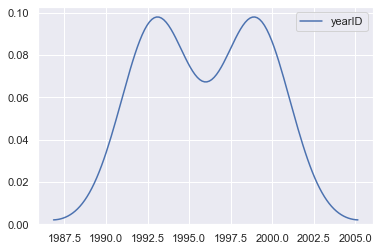

In [83]:
myCSV=pd.read_csv('data/Salaries.csv',header=0, index_col=3, skiprows= [1,2], engine='python')
myCSV=pd.DataFrame(myCSV)
ax1=sns.kdeplot(myCSV["yearID"][myCSV["salary"]==1],color='r')
ax2=sns.kdeplot(myCSV["yearID"][myCSV["salary"]==0],color='b')

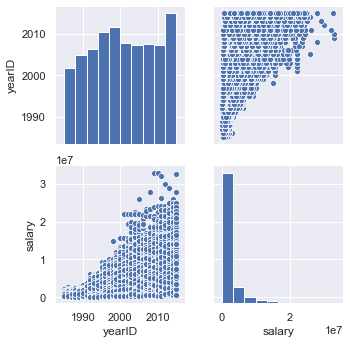

In [84]:
sns.pairplot(myCSV)

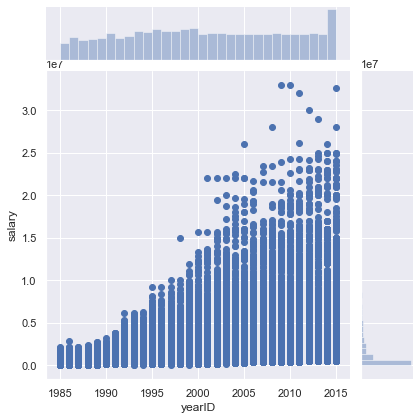

In [88]:
sns.jointplot(x = "yearID",y="salary",data=myCSV)

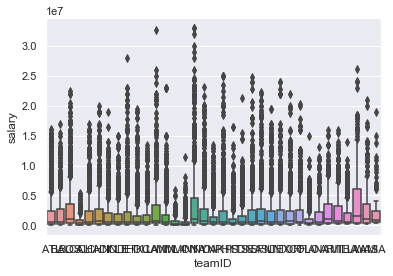

In [91]:
sns.boxplot(x="teamID", y="salary",data = myCSV)

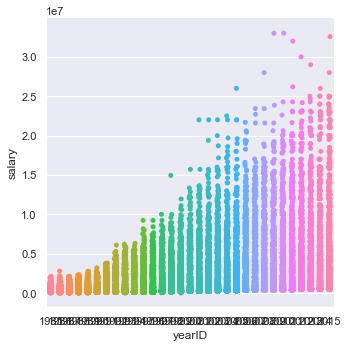

In [95]:
sns.catplot(x="yearID", y="salary", data=myCSV);

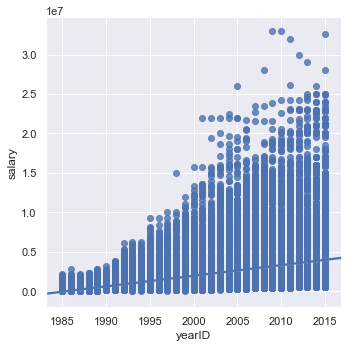

In [93]:
g = sns.lmplot(x="yearID", y="salary", data=myCSV,palette="Set1")

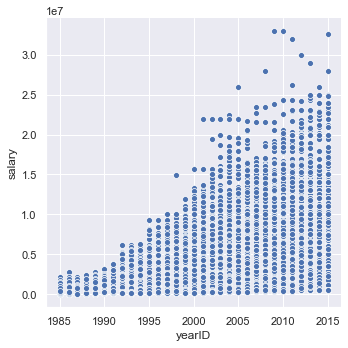

In [94]:
g = sns.relplot(x="yearID", y="salary", data=myCSV)

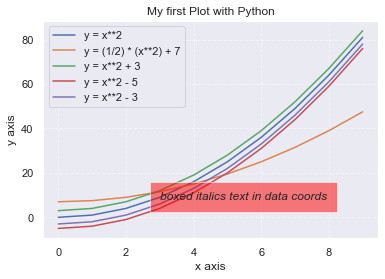

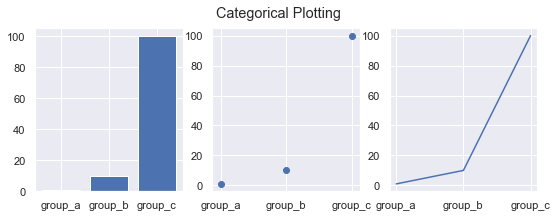

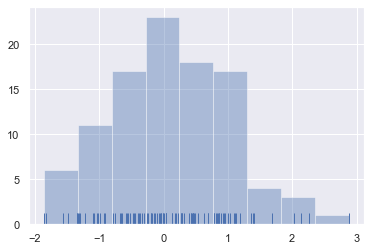

In [96]:

import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(10))
y = x ** 2

plt.plot(x,y,label='y = x**2')
plt.plot(x,(1/2)* y + 7,label='y = (1/2) * (x**2) + 7')
plt.plot(x,y + 3,label='y = x**2 + 3')
plt.plot(x,y - 5,label='y = x**2 - 5')
plt.plot(x,y - 3,label='y = x**2 - 3')

plt.title('My first Plot with Python')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.grid(alpha=.4,linestyle='--')

plt.legend()

plt.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.show()

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

plt.gca()

from scipy import stats, integrate
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

x = np.random.normal(size=100)
sns.distplot(x, kde=False, rug=True)